In [79]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
import sidetable as stb
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

import warnings 
warnings.filterwarnings('ignore')

In [188]:
df = pd.read_csv('final_sampling2.csv')
df.head()

,step,type,amount,nameorig,oldbalanceorg,newbalanceorig,namedest,oldbalancedest,newbalancedest,isfraud,isflaggedfraud
0,14,CASH_OUT,43433.16,C730593679,0.00,0.00,C1512527474,956413.17,999846.33,0,0
1,19,CASH_IN,303807.96,C982851722,1155077.07,1458885.04,C10573518,1662603.02,1358795.06,0,0
2,15,CASH_IN,353156.81,C965271173,32371.00,385527.81,C2006450982,0.00,0.00,0,0
3,11,PAYMENT,7940.63,C1817273820,1840.17,0.00,M103714876,0.00,0.00,0,0
4,10,PAYMENT,22488.28,C1565352337,13384.00,0.00,M626228905,0.00,0.00,0,0


In [189]:
df.stb.freq(['isfraud'], cum_cols=False)

#making sure that the ratio of sampled index and non sampled index stays the same 


,isfraud,count,percent
0,0,635441,99.870965
1,1,821,0.129035


### Encoding and feature engineering for Machine learning 

In [190]:
# the first letter of nameorig and name dest is unique ID for customer and merchant so we want that first letter before encoding it

df['nameorig'] = df['nameorig'].str[0]
df.head()

,step,type,amount,nameorig,oldbalanceorg,newbalanceorig,namedest,oldbalancedest,newbalancedest,isfraud,isflaggedfraud
0,14,CASH_OUT,43433.16,C,0.00,0.00,C1512527474,956413.17,999846.33,0,0
1,19,CASH_IN,303807.96,C,1155077.07,1458885.04,C10573518,1662603.02,1358795.06,0,0
2,15,CASH_IN,353156.81,C,32371.00,385527.81,C2006450982,0.00,0.00,0,0
3,11,PAYMENT,7940.63,C,1840.17,0.00,M103714876,0.00,0.00,0,0
4,10,PAYMENT,22488.28,C,13384.00,0.00,M626228905,0.00,0.00,0,0


In [191]:
# same goes to the name dest 

df['namedest'] = df['namedest'].str[0]
df.head()

,step,type,amount,nameorig,oldbalanceorg,newbalanceorig,namedest,oldbalancedest,newbalancedest,isfraud,isflaggedfraud
0,14,CASH_OUT,43433.16,C,0.00,0.00,C,956413.17,999846.33,0,0
1,19,CASH_IN,303807.96,C,1155077.07,1458885.04,C,1662603.02,1358795.06,0,0
2,15,CASH_IN,353156.81,C,32371.00,385527.81,C,0.00,0.00,0,0
3,11,PAYMENT,7940.63,C,1840.17,0.00,M,0.00,0.00,0,0
4,10,PAYMENT,22488.28,C,13384.00,0.00,M,0.00,0.00,0,0


In [192]:
df = pd.get_dummies(data = df, columns = ['type'] )
df.head()

,step,amount,nameorig,oldbalanceorg,newbalanceorig,namedest,oldbalancedest,newbalancedest,isfraud,isflaggedfraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,14,43433.16,C,0.00,0.00,C,956413.17,999846.33,0,0,0,1,0,0,0
1,19,303807.96,C,1155077.07,1458885.04,C,1662603.02,1358795.06,0,0,1,0,0,0,0
2,15,353156.81,C,32371.00,385527.81,C,0.00,0.00,0,0,1,0,0,0,0
3,11,7940.63,C,1840.17,0.00,M,0.00,0.00,0,0,0,0,0,1,0
4,10,22488.28,C,13384.00,0.00,M,0.00,0.00,0,0,0,0,0,1,0


In [193]:
df = pd.get_dummies(data = df, columns = ['nameorig'])
df = pd.get_dummies(data = df, columns = ['namedest'])
df.head()

,step,amount,oldbalanceorg,newbalanceorig,oldbalancedest,newbalancedest,isfraud,isflaggedfraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameorig_C,namedest_C,namedest_M
0,14,43433.16,0.00,0.00,956413.17,999846.33,0,0,0,1,0,0,0,1,1,0
1,19,303807.96,1155077.07,1458885.04,1662603.02,1358795.06,0,0,1,0,0,0,0,1,1,0
2,15,353156.81,32371.00,385527.81,0.00,0.00,0,0,1,0,0,0,0,1,1,0
3,11,7940.63,1840.17,0.00,0.00,0.00,0,0,0,0,0,1,0,1,0,1
4,10,22488.28,13384.00,0.00,0.00,0.00,0,0,0,0,0,1,0,1,0,1


In [194]:
## binning step into different time 

step_bin = [-1, 5, 11, 18, 24]
label_bin = ['midnight', 'morning', 'afternoon', 'evening']

df['time'] = pd.cut(df['step'], bins = step_bin, labels = label_bin )
df.head()

,step,amount,oldbalanceorg,newbalanceorig,oldbalancedest,newbalancedest,isfraud,isflaggedfraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameorig_C,namedest_C,namedest_M,time
0,14,43433.16,0.00,0.00,956413.17,999846.33,0,0,0,1,0,0,0,1,1,0,afternoon
1,19,303807.96,1155077.07,1458885.04,1662603.02,1358795.06,0,0,1,0,0,0,0,1,1,0,evening
2,15,353156.81,32371.00,385527.81,0.00,0.00,0,0,1,0,0,0,0,1,1,0,afternoon
3,11,7940.63,1840.17,0.00,0.00,0.00,0,0,0,0,0,1,0,1,0,1,morning
4,10,22488.28,13384.00,0.00,0.00,0.00,0,0,0,0,0,1,0,1,0,1,morning


In [195]:
df = pd.get_dummies(data = df, columns = ['time'])
df.head()

,step,amount,oldbalanceorg,newbalanceorig,oldbalancedest,newbalancedest,isfraud,isflaggedfraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameorig_C,namedest_C,namedest_M,time_midnight,time_morning,time_afternoon,time_evening
0,14,43433.16,0.00,0.00,956413.17,999846.33,0,0,0,1,0,0,0,1,1,0,0,0,1,0
1,19,303807.96,1155077.07,1458885.04,1662603.02,1358795.06,0,0,1,0,0,0,0,1,1,0,0,0,0,1
2,15,353156.81,32371.00,385527.81,0.00,0.00,0,0,1,0,0,0,0,1,1,0,0,0,1,0
3,11,7940.63,1840.17,0.00,0.00,0.00,0,0,0,0,0,1,0,1,0,1,0,1,0,0
4,10,22488.28,13384.00,0.00,0.00,0.00,0,0,0,0,0,1,0,1,0,1,0,1,0,0


In [196]:
# since there's only 1 value for nameorig we're going to drop it, and since the sample value doesn't have transaction 
# that is flagged fraud we're going to drop the column as well
# but first we're going to rename all the columns into lower case first because of preference

df.columns = df.columns.str.lower()
df.head()

,step,amount,oldbalanceorg,newbalanceorig,oldbalancedest,newbalancedest,isfraud,isflaggedfraud,type_cash_in,type_cash_out,type_debit,type_payment,type_transfer,nameorig_c,namedest_c,namedest_m,time_midnight,time_morning,time_afternoon,time_evening
0,14,43433.16,0.00,0.00,956413.17,999846.33,0,0,0,1,0,0,0,1,1,0,0,0,1,0
1,19,303807.96,1155077.07,1458885.04,1662603.02,1358795.06,0,0,1,0,0,0,0,1,1,0,0,0,0,1
2,15,353156.81,32371.00,385527.81,0.00,0.00,0,0,1,0,0,0,0,1,1,0,0,0,1,0
3,11,7940.63,1840.17,0.00,0.00,0.00,0,0,0,0,0,1,0,1,0,1,0,1,0,0
4,10,22488.28,13384.00,0.00,0.00,0.00,0,0,0,0,0,1,0,1,0,1,0,1,0,0


In [197]:
df = df.drop(columns = ['nameorig_c', 'isflaggedfraud'])
df.head()

,step,amount,oldbalanceorg,newbalanceorig,oldbalancedest,newbalancedest,isfraud,type_cash_in,type_cash_out,type_debit,type_payment,type_transfer,namedest_c,namedest_m,time_midnight,time_morning,time_afternoon,time_evening
0,14,43433.16,0.00,0.00,956413.17,999846.33,0,0,1,0,0,0,1,0,0,0,1,0
1,19,303807.96,1155077.07,1458885.04,1662603.02,1358795.06,0,1,0,0,0,0,1,0,0,0,0,1
2,15,353156.81,32371.00,385527.81,0.00,0.00,0,1,0,0,0,0,1,0,0,0,1,0
3,11,7940.63,1840.17,0.00,0.00,0.00,0,0,0,0,1,0,0,1,0,1,0,0
4,10,22488.28,13384.00,0.00,0.00,0.00,0,0,0,0,1,0,0,1,0,1,0,0


In [198]:
## now all the object columns hasbeen encoded we can start looking at the correlation and do features selection

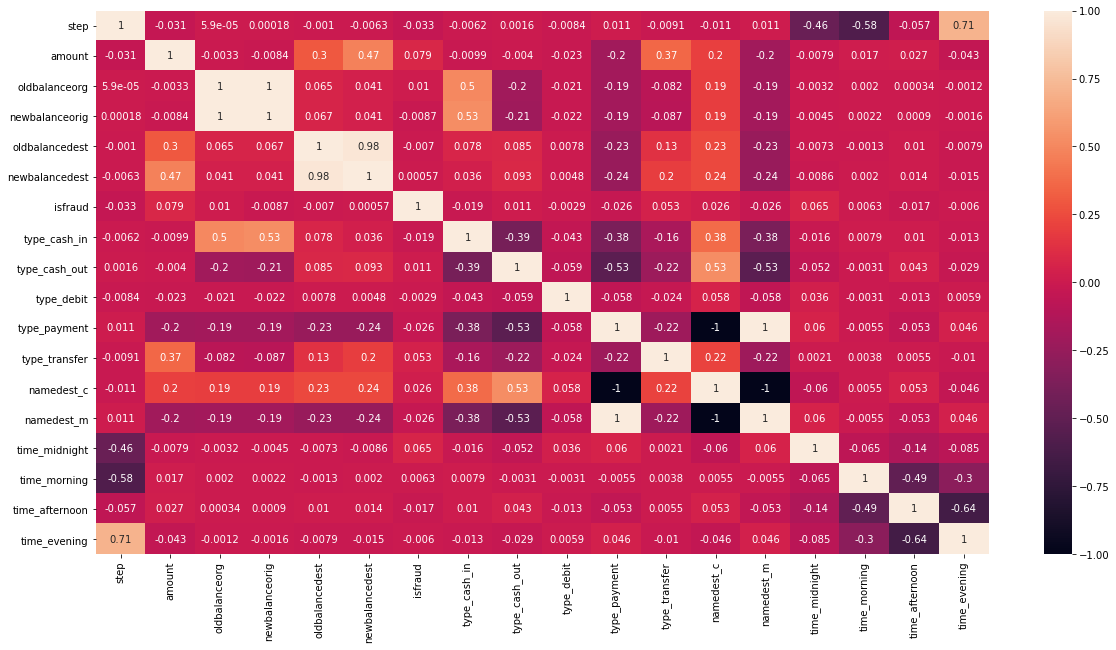

In [199]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(),  annot = True)


In [200]:
correlation = df.corr()
correlation['isfraud'].sort_values(ascending = False)[1:]

# from the correlation and from past eda we know that fraud could happened at any time of the day so we will take step
# and the type of transaction only transfer and cashout
# 98% of fraud emptied theeir bank account se we will take all the balance column as features

amount            0.078708
time_midnight     0.065003
type_transfer     0.053407
namedest_c        0.025641
type_cash_out     0.011381
oldbalanceorg     0.010088
time_morning      0.006258
newbalancedest    0.000572
type_debit       -0.002901
time_evening     -0.005991
oldbalancedest   -0.007038
newbalanceorig   -0.008721
time_afternoon   -0.016781
type_cash_in     -0.019100
type_payment     -0.025641
namedest_m       -0.025641
step             -0.032859
Name: isfraud, dtype: float64

### Feature Selection 

In [201]:
X = df[['amount', 'newbalanceorig','step','oldbalanceorg','oldbalancedest', 'newbalancedest']]
y = df['isfraud']

X_train, X_test, y_train, y_test = train_test_split(X, y , random_state = 42, test_size = 0.2, stratify = y)

### Smote Process since the data is imbalance 


since we know after the eda the data is imbalance we will handle it before processing it into machine learning


In [202]:
import imblearn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)

In [203]:
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

In [204]:
df_smote = pd.concat([X_train_sm, y_train_sm], axis = 1)
df_smote['isfraud'].value_counts()

# this is just for sanity check to make sure that it's been done correctly

1    508352
0    508352
Name: isfraud, dtype: int64

In [205]:
X_train_sm.head()

,amount,newbalanceorig,step,oldbalanceorg,oldbalancedest,newbalancedest
0,5325.35,0.00,15,0.00,0.00,0.00
1,355295.42,0.00,16,164.00,0.00,355295.42
2,25789.44,27298.63,20,53088.08,0.00,0.00
3,9813016.49,0.00,16,21424.00,1526106.09,11339122.58
4,55830.64,7165711.16,20,7109880.52,114066.21,58235.56


### Model Building

#### KNN

In [206]:
KNN_base = KNeighborsClassifier()
KNN_base.fit(X_train_sm, y_train_sm)
y_pred_KNN_base = KNN_base.predict(X_test)
y_pred_KNN_base_train = KNN_base.predict(X_train_sm)

In [207]:
recall_KNN_base = recall_score(y_test, y_pred_KNN_base)
acc_KNN_base = accuracy_score(y_test, y_pred_KNN_base)
precision_KNN_base = precision_score(y_test, y_pred_KNN_base)
f1_KNN_base = f1_score(y_test, y_pred_KNN_base)
recall_KNN_base_train = recall_score(y_train_sm, y_pred_KNN_base_train)

print(f"train recall: {recall_KNN_base_train}")
print(f"test recall: {recall_KNN_base}")

train recall: 0.9999036100969407
test recall: 0.823170731707317


In [208]:
print(classification_report(y_test, y_pred_KNN_base))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    127089
           1       0.12      0.82      0.21       164

    accuracy                           0.99    127253
   macro avg       0.56      0.91      0.61    127253
weighted avg       1.00      0.99      1.00    127253



In [209]:
cm_KNN_base = confusion_matrix(y_test, y_pred_KNN_base, labels = [1,0])
df_KNN_base = pd.DataFrame(data = cm_KNN_base, index = ['aktual 1', 'aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_KNN_base



,Prediksi 1,Prediksi 0
aktual 1,135,29
aktual 0,962,126127


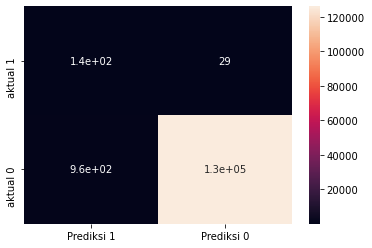

In [210]:
sns.heatmap(df_KNN_base, annot = True)

### Logistic Regression

In [211]:
logreg_base =LogisticRegression()
logreg_base.fit(X_train_sm, y_train_sm)
y_pred_logreg_base = logreg_base.predict(X_test)
y_pred_logreg_base_train = logreg_base.predict(X_train_sm)

In [212]:
recall_logreg_base = recall_score(y_test, y_pred_logreg_base)
acc_logreg_base = accuracy_score(y_test, y_pred_logreg_base)
precision_logreg_base = precision_score(y_test, y_pred_logreg_base)
f1_logreg_base = f1_score(y_test, y_pred_logreg_base)
recall_logreg_base_train = recall_score(y_train_sm, y_pred_logreg_base_train)

print(f"train recall: {recall_logreg_base_train}")
print(f"test recall: {recall_logreg_base}")

train recall: 0.9903924839481304
test recall: 0.9878048780487805


In [213]:
print(classification_report(y_test, y_pred_logreg_base))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    127089
           1       0.02      0.99      0.04       164

    accuracy                           0.94    127253
   macro avg       0.51      0.96      0.50    127253
weighted avg       1.00      0.94      0.97    127253



In [214]:
cm_logreg_base = confusion_matrix(y_test, y_pred_logreg_base, labels = [1,0])
df_logreg_base = pd.DataFrame(data = cm_logreg_base, index = ['aktual 1', 'aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_logreg_base

,Prediksi 1,Prediksi 0
aktual 1,162,2
aktual 0,7932,119157


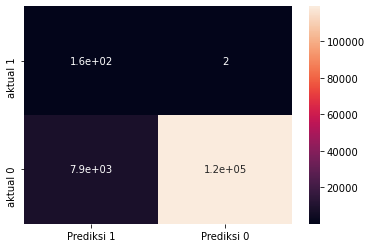

In [215]:
sns.heatmap(df_logreg_base, annot = True)

# logistic regression get a perfect score for everything 
# this might be due to the low number of population

# need to validate this further

### Decision Tree

In [216]:
DT_base =DecisionTreeClassifier()
DT_base.fit(X_train_sm, y_train_sm)
y_pred_DT_base = DT_base.predict(X_test)
y_pred_DT_base_train = DT_base.predict(X_train_sm)

In [217]:
recall_DT_base = recall_score(y_test, y_pred_DT_base)
acc_DT_base = accuracy_score(y_test, y_pred_DT_base)
precision_DT_base = precision_score(y_test, y_pred_DT_base)
f1_DT_base = f1_score(y_test, y_pred_DT_base)
recall_DT_base_train = recall_score(y_train_sm, y_pred_DT_base_train)

print(f"train recall: {recall_DT_base_train}")
print(f"test recall: {recall_DT_base}")

train recall: 1.0
test recall: 0.8353658536585366


In [218]:
print(classification_report(y_test, y_pred_DT_base))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127089
           1       0.43      0.84      0.56       164

    accuracy                           1.00    127253
   macro avg       0.71      0.92      0.78    127253
weighted avg       1.00      1.00      1.00    127253



In [219]:
cm_DT_base = confusion_matrix(y_test, y_pred_DT_base, labels = [1,0])
df_DT_base = pd.DataFrame(data = cm_DT_base, index = ['aktual 1', 'aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_DT_base

,Prediksi 1,Prediksi 0
aktual 1,137,27
aktual 0,185,126904


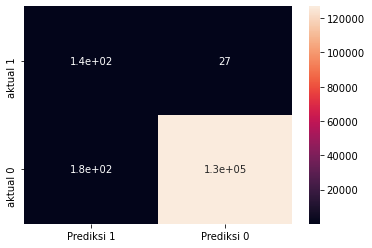

In [220]:
sns.heatmap(df_DT_base, annot =True )

In [223]:
eva_met_base = {
    "LogisticReg": [acc_logreg_base,precision_logreg_base,recall_logreg_base,f1_logreg_base],
    "KNN": [acc_KNN_base, precision_KNN_base, recall_KNN_base, f1_KNN_base],
    "DecisionTree": [acc_DT_base, precision_DT_base, recall_DT_base, f1_DT_base] }

eva_base = pd.DataFrame(data = eva_met_base, index = ['Accuracy', 'Precision', 'Recall', 'F1-Score'])
eva_base


# we can see that using base model that precision has the highest recall score, it only has 2 false negative

,LogisticReg,KNN,DecisionTree
Accuracy,0.937652,0.992212,0.998334
Precision,0.020015,0.123063,0.425466
Recall,0.987805,0.823171,0.835366
F1-Score,0.039235,0.214116,0.563786


### Scalling

In [224]:
from sklearn.preprocessing import RobustScaler

In [226]:
## saclling 

robust_scaler = RobustScaler()
X_train_scaled = robust_scaler.fit_transform(X_train_sm)
X_test_scaled = robust_scaler.fit_transform(X_test)

### KNN Scaled

In [235]:
KNN_scaled = KNeighborsClassifier()
KNN_scaled.fit(X_train_scaled, y_train_sm)
y_pred_KNN_scaled = KNN_scaled.predict(X_test_scaled)
y_pred_KNN_scaled_train = KNN_scaled.predict(X_train_scaled)

In [236]:
recall_KNN_scaled = recall_score(y_test, y_pred_KNN_scaled)
acc_KNN_scaled = accuracy_score(y_test, y_pred_KNN_scaled)
precision_KNN_scaled = precision_score(y_test, y_pred_KNN_scaled)
f1_KNN_scaled = f1_score(y_test, y_pred_KNN_scaled)
recall_KNN_scaled_train = recall_score(y_train_sm, y_pred_KNN_scaled_train)

print(f"train recall: {recall_KNN_scaled_train}")
print(f"test recall: {recall_KNN_scaled}")

train recall: 0.9929143585547022
test recall: 0.9207317073170732


In [238]:
print(classification_report(y_test, y_pred_KNN_scaled))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75    127089
           1       0.00      0.92      0.01       164

    accuracy                           0.60    127253
   macro avg       0.50      0.76      0.38    127253
weighted avg       1.00      0.60      0.75    127253



In [239]:
cm_KNN_scaled = confusion_matrix(y_test, y_pred_KNN_scaled, labels = [1,0])
df_KNN_scaled = pd.DataFrame(data = cm_KNN_scaled, index = ['aktual 1', 'aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_KNN_scaled


,Prediksi 1,Prediksi 0
aktual 1,151,13
aktual 0,50889,76200


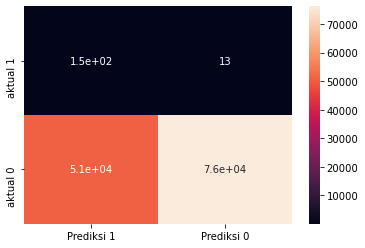

In [240]:
sns.heatmap(df_KNN_scaled, annot = True)

### Logreg Scaled

In [229]:
logreg_scaled =LogisticRegression()
logreg_scaled.fit(X_train_scaled, y_train_sm)
y_pred_logreg_scaled = logreg_scaled.predict(X_test_scaled)
y_pred_logreg_scaled_train = logreg_scaled.predict(X_train_scaled)

In [230]:
recall_logreg_scaled = recall_score(y_test, y_pred_logreg_scaled)
acc_logreg_scaled = accuracy_score(y_test, y_pred_logreg_scaled)
precision_logreg_scaled = precision_score(y_test, y_pred_logreg_scaled)
f1_logreg_scaled = f1_score(y_test, y_pred_logreg_scaled)
recall_logreg_scaled_train = recall_score(y_train_sm, y_pred_logreg_scaled_train)

print(f"train recall: {recall_logreg_scaled_train}")
print(f"test recall: {recall_logreg_scaled}")

train recall: 0.7039334949011709
test recall: 0.9024390243902439


In [231]:
print(classification_report(y_test, y_pred_logreg_scaled))

              precision    recall  f1-score   support

           0       1.00      0.73      0.84    127089
           1       0.00      0.90      0.01       164

    accuracy                           0.73    127253
   macro avg       0.50      0.82      0.43    127253
weighted avg       1.00      0.73      0.84    127253



In [233]:
cm_logreg_scaled = confusion_matrix(y_test, y_pred_logreg_scaled, labels = [1,0])
df_logreg_scaled = pd.DataFrame(data = cm_logreg_scaled, index = ['aktual 1', 'aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
df_logreg_scaled

# the recall score is worse after scalling compared to before scalling 

,Prediksi 1,Prediksi 0
aktual 1,148,16
aktual 0,34513,92576


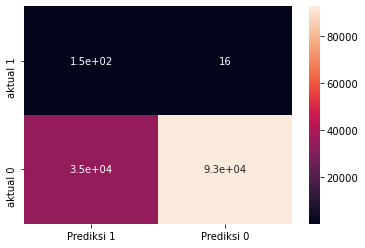

In [234]:
sns.heatmap(df_logreg_scaled, annot = True)

In [241]:
eva_met_scaled = {
    "LogisticReg": [acc_logreg_scaled,precision_logreg_scaled,recall_logreg_scaled,f1_logreg_scaled],
    "KNN": [acc_KNN_scaled, precision_KNN_scaled, recall_KNN_scaled, f1_KNN_scaled] }

eva_scaled = pd.DataFrame(data = eva_met_scaled, index = ['Accuracy', 'Precision', 'Recall', 'F1-Score'])
eva_scaled

,LogisticReg,KNN
Accuracy,0.728659,0.599994
Precision,0.004270,0.002958
Recall,0.902439,0.920732
F1-Score,0.008500,0.005898


In [242]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [244]:
display_side_by_side([eva_base, eva_scaled], ['Base', 'Scaled'])

# we can see from the table below that non scaled logistic regression has the best recall score compared to any model

### Hyperparameter Tuning

#### logistic Regression

In [246]:
logreg_tuning = LogisticRegression()
param_logreg = {'C': [1, 0.5, 0.1, 5, 9],
               'penalty':['l2','l1', 'elasticnet']}

model_logreg_tuned = GridSearchCV(estimator = logreg_tuning_base, param_grid = param_logreg_base, cv = 5, n_jobs = -1 , verbose = 1, scoring = 'recall')
model_logreg_tuned.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  1.4min finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 0.5, 0.1, 5, 9],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='recall', verbose=1)

In [248]:
logreg_tuned = model_logreg_tuned.best_estimator_
y_pred_logreg_tuned = logreg_tuned.predict(X_test)
y_pred_logreg_train_tuned = logreg_tuned.predict(X_train_sm)

recall_logreg_tuned = recall_score(y_test, y_pred_logreg_tuned)
acc_logreg_tuned = accuracy_score(y_test, y_pred_logreg_tuned)
precision_logreg_tuned = precision_score(y_test, y_pred_logreg_tuned)
f1_logreg_tuned = f1_score(y_test, y_pred_logreg_tuned)
recall_logreg_train_tuned = recall_score(y_train_sm, y_pred_logreg_train_tuned)

print(f"train recall: {recall_logreg_train_tuned}")
print(f"test recall: {recall_logreg_tuned}")

# it seems the score doesnt change any difference for logistic regression after hyper parameter tuning

train recall: 0.9903924839481304
test recall: 0.9878048780487805


In [249]:
print(classification_report(y_test, y_pred_logreg_tuned))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    127089
           1       0.02      0.99      0.04       164

    accuracy                           0.94    127253
   macro avg       0.51      0.96      0.50    127253
weighted avg       1.00      0.94      0.97    127253



In [252]:
cm_logreg_tuned = confusion_matrix(y_test, y_pred_logreg_tuned, labels = [1,0])
df_logreg_tuned = pd.DataFrame(data = cm_logreg_tuned, index = ['aktual 1', 'aktual 0'], columns = ['Prediksi 1', 'Prediksi 0'])
display_side_by_side([df_logreg_tuned, df_logreg_base], ['Tuned', 'Base'])

# side by side comparison after hyper parameter tuning and before hyper parameter tuning, there's no difference before or after
# the hyper parameter tuning for logistic regression model

,Prediksi 1,Prediksi 0
aktual 1,162,2
aktual 0,7932,119157
,Prediksi 1,Prediksi 0
aktual 1,162,2
aktual 0,7932,119157


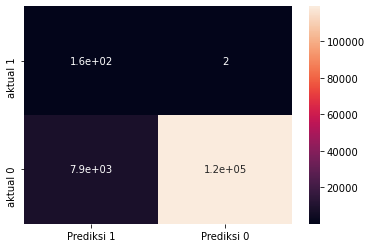

In [251]:
sns.heatmap(df_logreg_tuned, annot =True)

## Machine Learning Conclution, & Future Improvement


### Conclution

- **Logistic Regression has the best recall score among all algorithm that we tried in this notebook**
    - Among all the algorithm in this notebook that we tried (Logistic Regression, KNN, and Decision Tree) Logistic regression has the best recall score **(98.7%)**
    

- **Scalling doesn't effect much on Logistic Regression for this case**
    - This dataset has a big range, for certain coulumns, like step compared to all the balance columns, and usually how we tackle this is using scalling, however after scalling process our evaluation matrix did not get any better **(For Logistic Regression Case)**, for KNN it seems to improve the evaluation matrix of the algorithm
    

### Future Improvement

- **Use The Entire Population for machine learning process** 

For this machine learning process this notebook used a stratifed sampled data from the fraud and non fraud group, this notebook only contain 10% of data out of the entire population, for future improvement, for machine learning process we could use an entire dataset for machine learning process, as we know the more the data the better the model is


- **Tryout Different Algorithm**


for this machine learning process this notebook use 3 different kind of algorithm (*Logistic Regression*, *KNeighborClassifier*, and *DecisionTreeClassifier*), in the future we could use different kind of classification and compared with the 3 algorithm that we use


- **Hyperparameter Tuning For all algorithm**


due to the computational power of local laptop, this notebook only have 1 hyperparameter tuning which is *Logistic Regression*, for future imporovement we could do hyperparameter tuning in all algortihm